In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

In [3]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1, 
                  train_size=0.8, 
                  test_size=0.2, 
                  random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [16]:
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
clf.C = 1.0
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.956140350877193

In [19]:
clf.C = 100 # ロジスティクス回帰式の定数Cのこと
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9736842105263158

In [20]:
C_range = [1e-5, 1e-3, 1e-2, 1, 1e2, 1e5, 1e10] # 定数Cを100倍ずつ変えている

In [22]:
C_range_exp = np.arange(-15.0, 21.0)
C_range = 10 ** C_range_exp # 10e-15から10e21までのレンジを設定

In [25]:
# 上のような手法で範囲をとれるが、scikit-learnにはGridSearchCVというモジュールがある
from sklearn.model_selection import GridSearchCV

param = {'C': C_range} # clf.Cに該当
gs = GridSearchCV(clf, param)
gs.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-15, 1.e-14, 1.e-13, 1.e-12, 1.e-11, 1.e-10, 1.e-09, 1.e-08,
       1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00,
       1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08,
       1.e+09, 1.e+10, 1.e+11, 1.e+12, 1.e+13, 1.e+14, 1.e+15, 1.e+16,
       1.e+17, 1.e+18, 1.e+19, 1.e+20])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [ ]:
gs.cv_results_ # GridSearchの結果確認

In [30]:
gs.best_params_, gs.best_score_, gs.best_estimator_ # 最もよいパラメータを取得
# Cが10.0のとき最高の結果が得られている

({'C': 10.0},
 0.967032967032967,
 LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False))

In [32]:
gs.score(X_test, y_test) # 最もよいパラメータを用いたスコア算出

0.9649122807017544

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


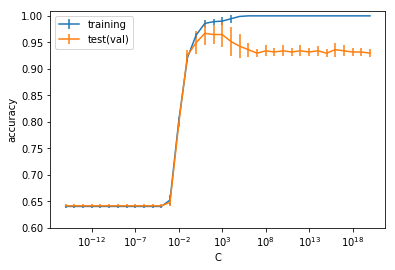

In [35]:
plt.errorbar(gs.cv_results_['param_C'].data,
                gs.cv_results_['mean_train_score'],
                yerr=gs.cv_results_['std_train_score'],
                label="training")

plt.errorbar(gs.cv_results_['param_C'].data,
                gs.cv_results_['mean_test_score'],
                yerr=gs.cv_results_['std_test_score'],
                label="test(val)")

plt.ylim(.6, 1.01)
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("accuracy")
plt.legend(loc="best")

# グラフより、Cの値が大きすぎると過学習が起きて、スコアが下がってしまう傾向がある

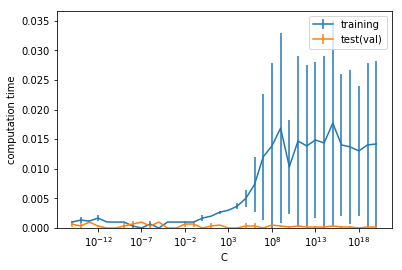

In [37]:
plt.errorbar(gs.cv_results_['param_C'].data,
                gs.cv_results_['mean_fit_time'],
                yerr=gs.cv_results_['std_fit_time'],
                label="training")

plt.errorbar(gs.cv_results_['param_C'].data,
                gs.cv_results_['mean_score_time'],
                yerr=gs.cv_results_['std_score_time'],
                label="test(val)")

plt.ylim(0,)
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("computation time")
plt.legend(loc="best")

## 2パラメータ（C, kernel）SVMを使ったやりかた

In [40]:
from sklearn.svm import SVC

clf = SVC()

C_range_exp = np.arange(-2.0, 5.0)
C_range = 10 ** C_range_exp

param = {'C': C_range,
                 'kernel': ['linear', 'rbf']}

gs = GridSearchCV(clf, param, n_jobs=2, verbose=2)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=2)]: Done  42 out of  42 | elapsed:    4.3s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04]), 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [41]:
gs.best_params_, gs.best_score_, gs.best_estimator_

({'C': 100.0, 'kernel': 'rbf'},
 0.9714285714285714,
 SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


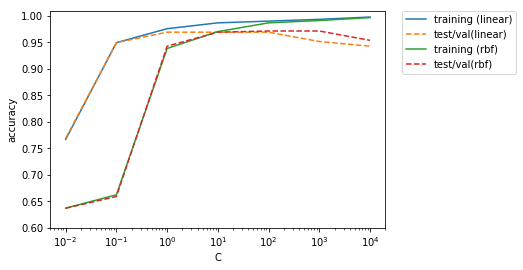

In [42]:
s_linear = [gs.cv_results_['param_kernel'] == 'linear']

plt.plot(gs.cv_results_['param_C'][s_linear].data,
            gs.cv_results_['mean_train_score'][s_linear],
            label="training (linear)")


plt.plot(gs.cv_results_['param_C'][s_linear].data,
            gs.cv_results_['mean_test_score'][s_linear],
            linestyle="--",
            label="test/val(linear)")

s_rbf = [gs.cv_results_['param_kernel'] == 'rbf']

plt.plot(gs.cv_results_['param_C'][s_rbf].data,
            gs.cv_results_['mean_train_score'][s_rbf],
            label="training (rbf)")


plt.plot(gs.cv_results_['param_C'][s_rbf].data,
            gs.cv_results_['mean_test_score'][s_rbf],
            linestyle="--",
            label="test/val(rbf)")

plt.ylim(.6, 1.01)
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("accuracy")
plt.legend(bbox_to_anchor=(1.05, 1) ,loc=2,  borderaxespad=0.)

In [43]:
gs.score(X_test, y_test)

0.9649122807017544

In [45]:
SVC(kernel='rbf').gamma # 変更可能なパラメータ

'auto'

## ３パラメータ(C, kernel, gamma)SVMを使ったやりかた

In [50]:
from sklearn.svm import SVC

clf = SVC()

C_range_exp = np.arange(-2.0, 10.0)
C_range = 10 ** C_range_exp

gamma_range_exp = np.arange(-10.0, 0.0, 3)
gamma_range = 10 ** gamma_range_exp

param = [{'C': C_range,
                 'kernel': ['linear']},
             {'C': C_range,
              'gamma': gamma_range,  
              'kernel': ['rbf']},
            ]

gs = GridSearchCV(clf, param, n_jobs=2, verbose=2)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=2)]: Done 180 out of 180 | elapsed:    5.7s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid=[{'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09]), 'kernel': ['linear']}, {'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09]), 'gamma': array([1.e-10, 1.e-07, 1.e-04, 1.e-01]), 'kernel': ['rbf']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [51]:
gs.best_params_, gs.best_score_, gs.best_estimator_

({'C': 10.0, 'gamma': 0.1, 'kernel': 'rbf'},
 0.9736263736263736,
 SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


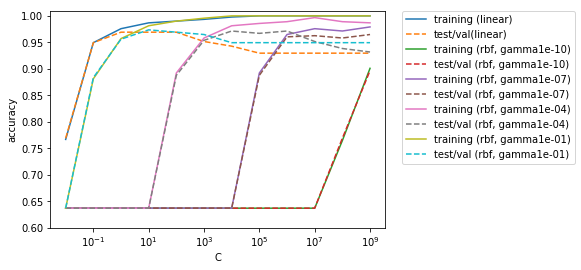

In [54]:
s_linear = [gs.cv_results_['param_kernel'] == 'linear']

plt.plot(gs.cv_results_['param_C'][s_linear].data,
            gs.cv_results_['mean_train_score'][s_linear],
            label="training (linear)")


plt.plot(gs.cv_results_['param_C'][s_linear].data,
            gs.cv_results_['mean_test_score'][s_linear],
            linestyle="--",
            label="test/val(linear)")

s_rbf = [gs.cv_results_['param_kernel'] == 'rbf']

for g in gamma_range:
    s_gamma = gs.cv_results_['param_gamma'][s_rbf].data == g
    
    plt.plot(gs.cv_results_['param_C'][s_rbf][s_gamma].data,
            gs.cv_results_['mean_train_score'][s_rbf][s_gamma],
            label="training (rbf, gamma{0:.0e})".format(g))

    plt.plot(gs.cv_results_['param_C'][s_rbf][s_gamma].data,
            gs.cv_results_['mean_test_score'][s_rbf][s_gamma],
            linestyle="--",
            label="test/val (rbf, gamma{0:.0e})".format(g))

plt.ylim(.6, 1.01)
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("accuracy")
plt.legend(bbox_to_anchor=(1.05, 1) ,loc=2,  borderaxespad=0.)

In [55]:
gs.score(X_test, y_test)

0.9649122807017544

## KNN法を使ったやりかた

In [56]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()

In [57]:
param = {'n_neighbors': range(1, 20)}

gs = GridSearchCV(clf, param)
gs.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': range(1, 20)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [58]:
gs.best_params_, gs.best_score_, gs.best_estimator_

({'n_neighbors': 5},
 0.9648351648351648,
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=5, p=2,
            weights='uniform'))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


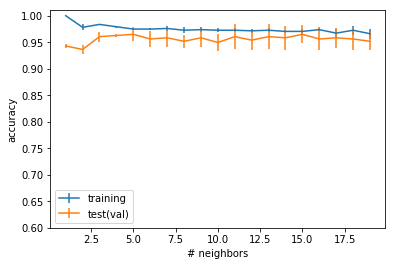

In [60]:
plt.errorbar(gs.cv_results_['param_n_neighbors'].data, 
             gs.cv_results_['mean_train_score'], 
             yerr=gs.cv_results_['std_train_score'],
             label="training")

plt.errorbar(gs.cv_results_['param_n_neighbors'].data,
             gs.cv_results_['mean_test_score'], 
             yerr=gs.cv_results_['std_test_score'],
             label="test(val)")

plt.ylim(.6, 1.01)
plt.xlabel("# neighbors")
plt.ylabel("accuracy")
plt.legend(loc="best");

In [61]:
gs.score(X_test, y_test)

0.956140350877193

## ランダムサーチ

In [63]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(max_iter=2000)
clf

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [64]:
param = {'hidden_layer_sizes': [(10,), (50,), (100,), 
                                            (10,10,), (50,50,), (100,100,),
                                            (10, 5,), (5,5,), (30, 20, 10),
                                            (100,1000,50,), (1000,100,50,),
                                            (10,10,10), (50,50,50), (100,100,100,),
                                            ],
            'activation': ['identity', 'logistic', 'tanh', 'relu'],
             'beta_1': [0.9, 0.8, 0.7, 0.6, 0.5],
             'beta_2': [0.999, 0.9, 0.8, 0.7],
             'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
        }

In [69]:
gs = GridSearchCV(clf, param, n_jobs=2, verbose=1)
# gs.fit(X_train, y_train)
# 実行すると、6000パタン以上となり、莫大な時間がかかるため今回はスルー

In [71]:
from sklearn.model_selection import RandomizedSearchCV

## ランダムに２０個のパタンを選択してモデルを作成
gs = RandomizedSearchCV(clf, param,
                                       n_iter=20,
                                        n_jobs=2, verbose=2)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:   12.4s
[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:   17.8s finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
          fit_params=None, iid=True, n_iter=20, n_jobs=2,
          param_distributions={'hidden_layer_sizes': [(10,), (50,), (100,), (10, 10), (50, 50), (100, 100), (10, 5), (5, 5), (30, 20, 10), (100, 1000, 50), (1000, 100, 50), (10, 10, 10), (50, 50, 50), (100, 100, 100)], 'activation': ['identity', 'logistic', 'tanh', 'relu'], 'beta_1': [0.9, 0.8, 0.7, 0.6, 0.5], 'beta_2': [0.999, 0.9, 0.8, 0.7], 'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1]},
          pre_dispatch='2*n_jobs', random_s

In [75]:
# ランダムに選んだ20のモデルの中で一番よい結果
gs.best_params_, gs.best_score_, gs.best_estimator_

({'hidden_layer_sizes': (100, 100),
  'beta_2': 0.9,
  'beta_1': 0.8,
  'alpha': 0.001,
  'activation': 'identity'},
 0.9714285714285714,
 MLPClassifier(activation='identity', alpha=0.001, batch_size='auto',
        beta_1=0.8, beta_2=0.9, early_stopping=False, epsilon=1e-08,
        hidden_layer_sizes=(100, 100), learning_rate='constant',
        learning_rate_init=0.001, max_iter=2000, momentum=0.9,
        nesterovs_momentum=True, power_t=0.5, random_state=None,
        shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
        verbose=False, warm_start=False))

In [76]:
# ランダムサーチは結果がでるまでの時間を短縮できるが、
# ランダムに選んだモデルを使用するため、スコアなどの結果が安定しない欠点がある
gs.score(X_test, y_test)

0.9649122807017544